In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.compose import ColumnTransformer

In [29]:
# import du csv
df = pd.read_csv('datasetClean.csv')

bmi_scale = [
    {"category": "Underweight", "range": [float("-inf"), 18.499]},
    {"category": "Healthy weight", "range": [18.5, 24.999]},
    {"category": "Overweight", "range": [25, 29.999]},
    {"category": "Obesity class I", "range": [30, 34.999]},
    {"category": "Obesity class II", "range": [35, 39.999]},
    {"category": "Obesity class III", "range": [40, float("inf")]},
]

bmi_count = []
for bmi in df["bmi"]:
    for group in bmi_scale:
        if bmi >= group["range"][0] and bmi <= group["range"][1]:
            bmi_count.append(group["category"])
            continue

df = df.drop("bmi", axis=1)
df["bmi"] = bmi_count


In [30]:
# selection des features et de la cible
X = df.drop('charges', axis=1)
y = df.charges

# Création du train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])


In [31]:
# Sélection des variables numériques
num_col = list(X.select_dtypes(include=[float,int]).columns)
# Sélection des variables catégorielles
cat_col = list(X.select_dtypes(include=[object]).columns)

# pipeline pour les valeurs numériques
my_num_pipe = make_pipeline(StandardScaler())

preprocessing = ColumnTransformer([
    ("one_hot", OneHotEncoder(),cat_col),
    ("scaling", my_num_pipe, num_col)
])

In [32]:
# j'ajoute la régression linéaire au pipeline
linearModel = LinearRegression()
pipe_lr = make_pipeline(preprocessing, PolynomialFeatures(2), linearModel)

# Je fit sur les données
pipe_lr.fit(X_train, y_train)

# le score
pipe_lr.score(X_test, y_test)

0.9226091870772848

In [42]:
# Je ré-utilise le pipeline mais avec lasso
pipe_lasso = make_pipeline(preprocessing, PolynomialFeatures(2), Lasso(alpha=37.3))

# Je ré-utilise le pipeline mais avec ridge
pipe_ridge = make_pipeline(preprocessing, PolynomialFeatures(2), Ridge(alpha=1.9))

# Je ré-utilise le pipeline avec ElasticNet
pipe_elastic = make_pipeline(preprocessing, PolynomialFeatures(2), ElasticNet())


In [34]:
pipe_ridge.fit(X_train, y_train)
pipe_ridge.score(X_test, y_test)

0.9227678569996711

In [43]:
pipe_lasso.fit(X_train, y_train)
pipe_lasso.score(X_test, y_test)

0.9239265733842204

In [36]:
cross_val_score(pipe_lasso, X_train, y_train, cv=5).mean()

/Users/sims/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.492e+07, tolerance: 1.397e+07
  model = cd_fast.enet_coordinate_descent(


0.8490255527453148

In [37]:
params = {
    'elasticnet__alpha': [0.0035, 0.004, 0.0048, 0.005, 0.0052],
    'elasticnet__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
    }


grid_search = GridSearchCV(pipe_elastic , param_grid=params , cv=5 , scoring='r2' )

grid_search.fit(X_train,y_train)

print(grid_search.best_params_)
print(grid_search.best_estimator_.score(X_test, y_test))


random_search = RandomizedSearchCV(pipe_elastic, param_distributions=params, n_iter=10, cv=5)

random_search.fit(X_train, y_train)

print(random_search.best_params_)
print(random_search.best_estimator_.score(X_test, y_test))

/Users/sims/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.983e+09, tolerance: 1.315e+07
  model = cd_fast.enet_coordinate_descent(
/Users/sims/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.840e+09, tolerance: 1.298e+07
  model = cd_fast.enet_coordinate_descent(
/Users/sims/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

KeyboardInterrupt: 

## Test de la modélisation de régression linéaire

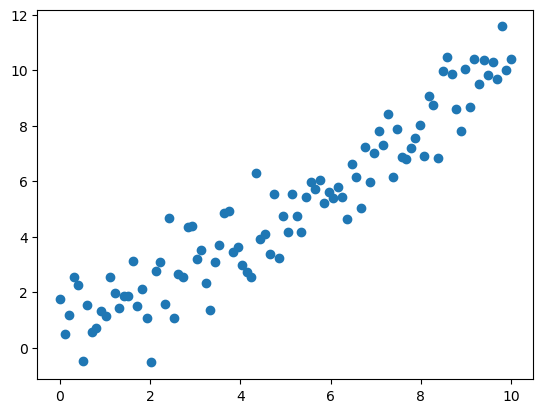

In [4]:
np.random.seed(0)
m = 100
X = np.linspace(0, 10, m).reshape(m, 1)
y = X + np.random.randn(m, 1)

plt.scatter(X,y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])

In [5]:
model = LinearRegression()
model.fit(X,y)
model.score(X,y)

0.8881140743377214

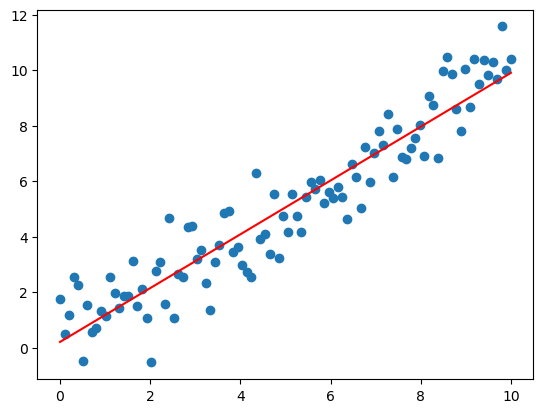

In [7]:
predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, c='r')